In [ ]:
# TODO: Do EDA of NUM_SAMPLES of the data
# WIP: May split this up so you don't have to rerun everything each time
# Data used is from sample tsv, results are random since it's not split into groups of 5 
# so preporcessed data should look better

----------------------------------------
Analyzing score column: MSGFScore
True rows MSGFScore mean: {true_mean}, std: {true_std}
False rows MSGFScore mean: {false_mean}, std: {false_std}

False rows with similar MSGFScore scores to their associated true rows:


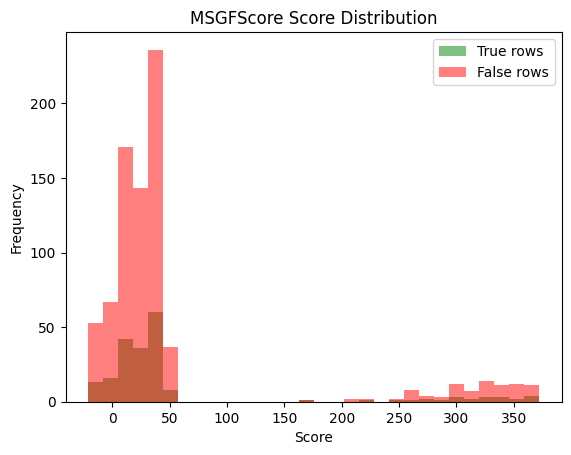

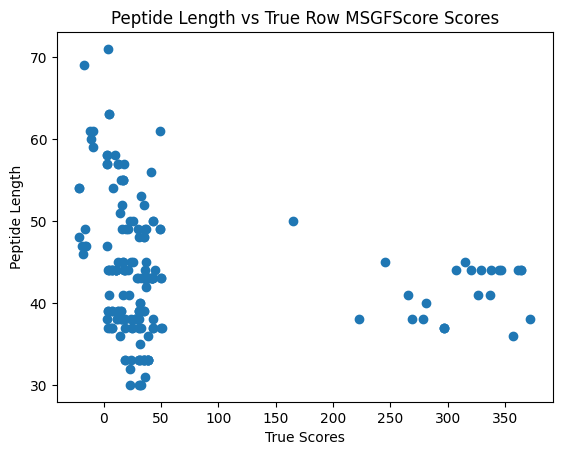

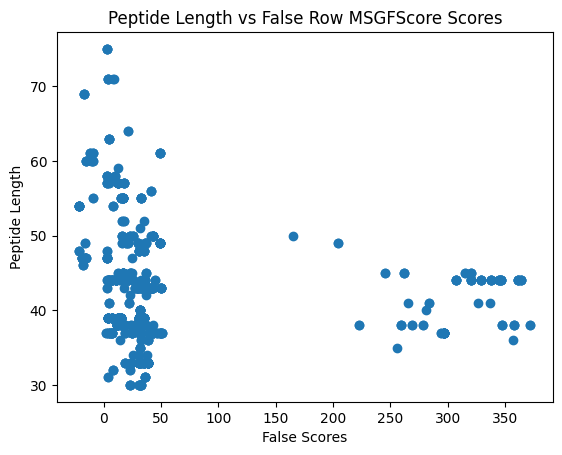

Data for rows containing modification C+
C+ True rows MSGFScore mean: 63.375, std: 102.89311272898115
C+ False rows MSGFScore mean: 66.38253638253639, std: 105.60219786721625


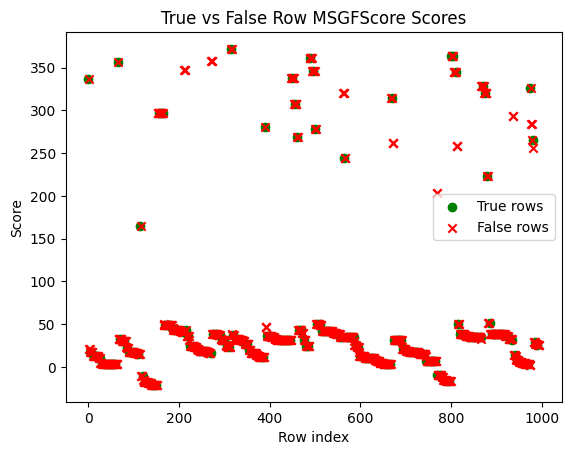



----------------------------------------
Analyzing score column: IsotopeError
True rows IsotopeError mean: {true_mean}, std: {true_std}
False rows IsotopeError mean: {false_mean}, std: {false_std}

False rows with similar IsotopeError scores to their associated true rows:


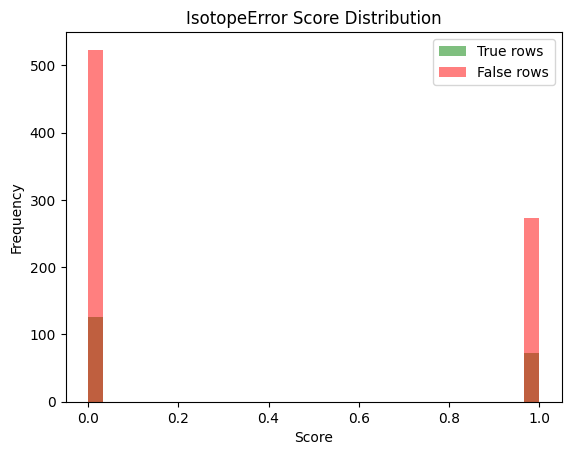

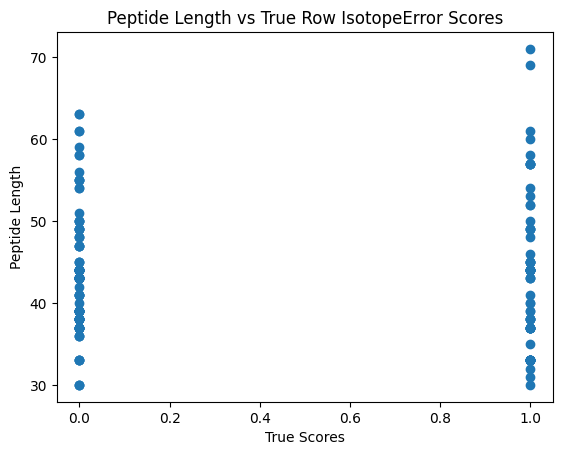

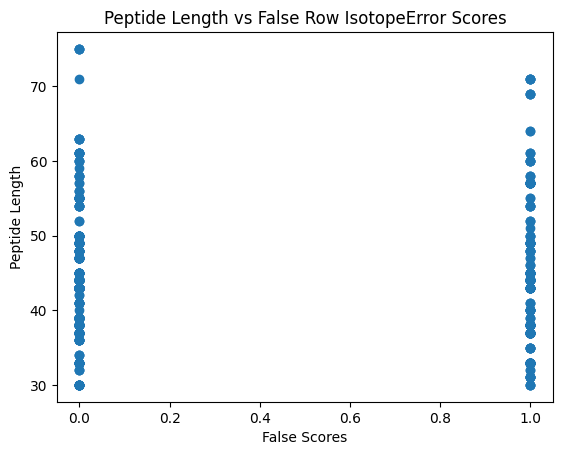

Data for rows containing modification C+
C+ True rows IsotopeError mean: 0.3416666666666667, std: 0.4762569981546901
C+ False rows IsotopeError mean: 0.35135135135135137, std: 0.477889504360975


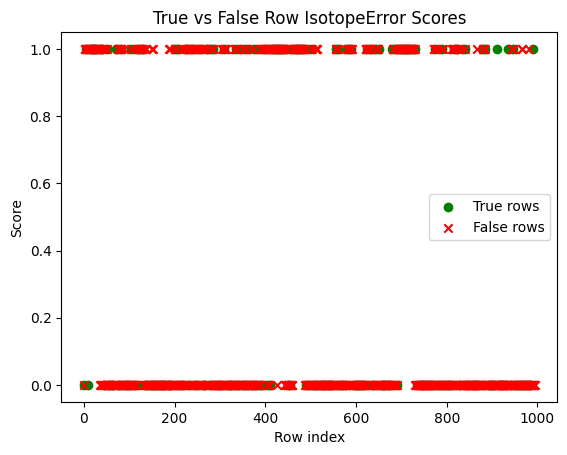



----------------------------------------
Analyzing score column: PrecursorError(ppm)
True rows PrecursorError(ppm) mean: {true_mean}, std: {true_std}
False rows PrecursorError(ppm) mean: {false_mean}, std: {false_std}

False rows with similar PrecursorError(ppm) scores to their associated true rows:


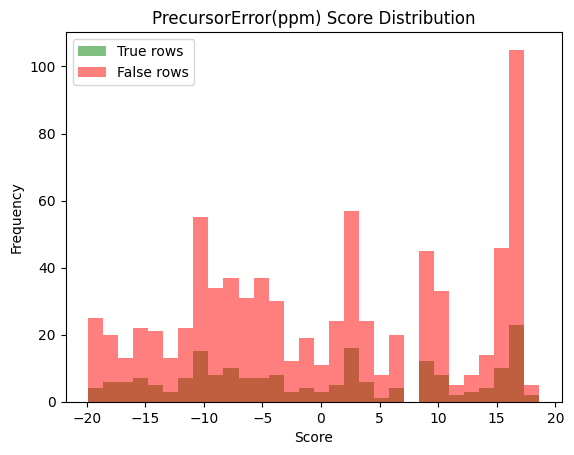

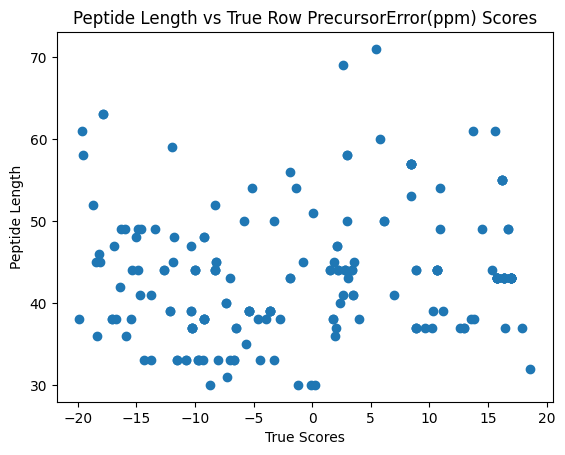

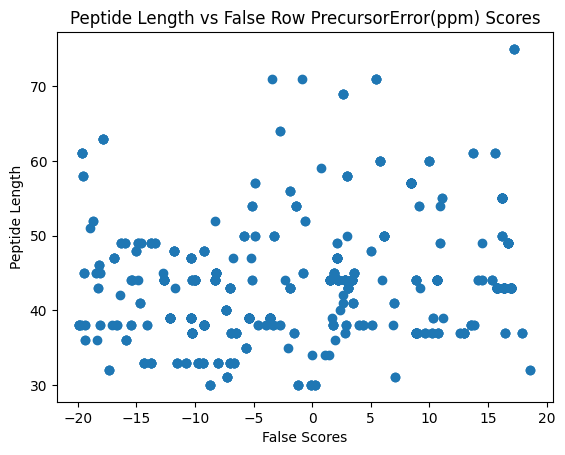

Data for rows containing modification C+
C+ True rows PrecursorError(ppm) mean: 2.761782634333333, std: 11.96818152660209
C+ False rows PrecursorError(ppm) mean: 4.074925874303534, std: 11.62835647900383


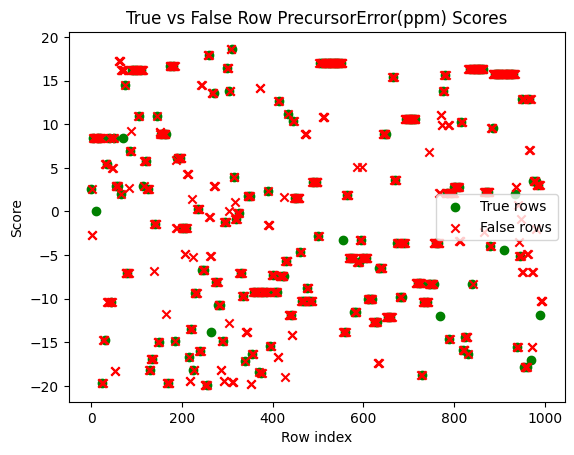



----------------------------------------
Analyzing score column: DeNovoScore
True rows DeNovoScore mean: {true_mean}, std: {true_std}
False rows DeNovoScore mean: {false_mean}, std: {false_std}

False rows with similar DeNovoScore scores to their associated true rows:


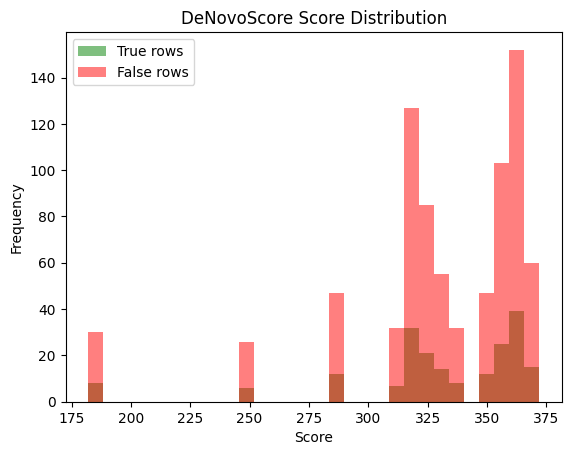

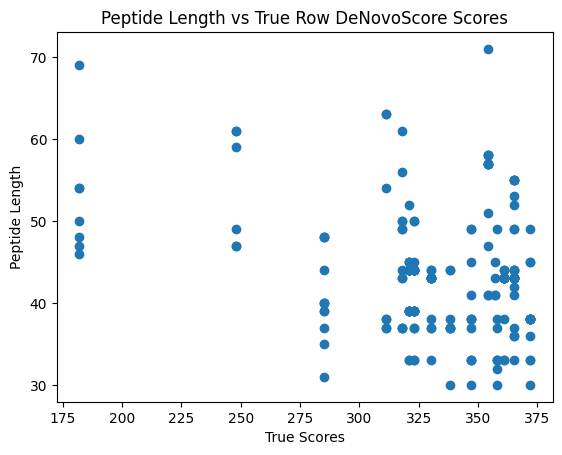

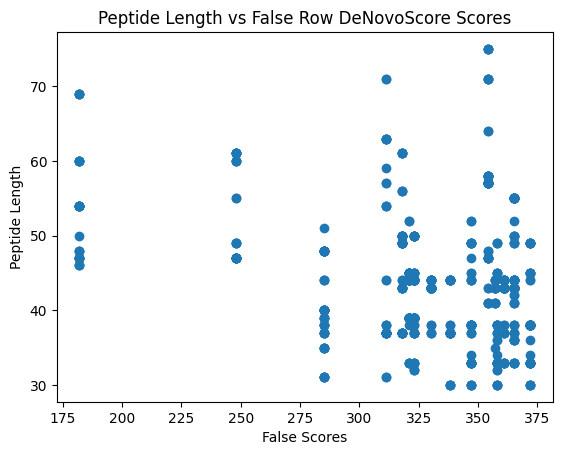

Data for rows containing modification C+
C+ True rows DeNovoScore mean: 330.81666666666666, std: 41.19169846472665
C+ False rows DeNovoScore mean: 331.1787941787942, std: 40.005797072128175


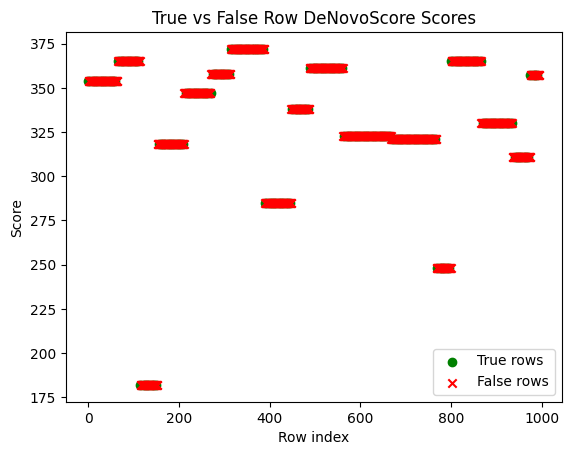



----------------------------------------
Analyzing score column: SpecEValue
True rows SpecEValue mean: {true_mean}, std: {true_std}
False rows SpecEValue mean: {false_mean}, std: {false_std}

False rows with similar SpecEValue scores to their associated true rows:


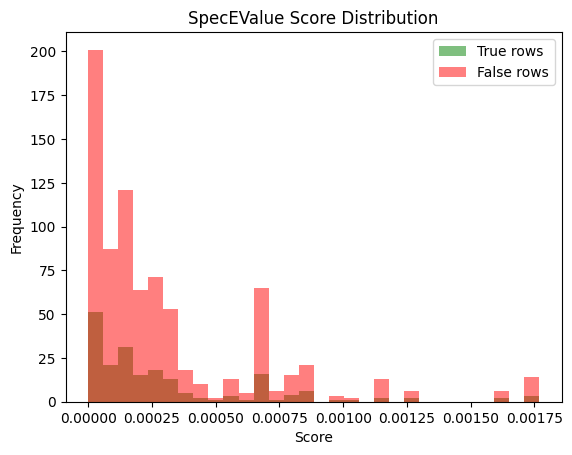

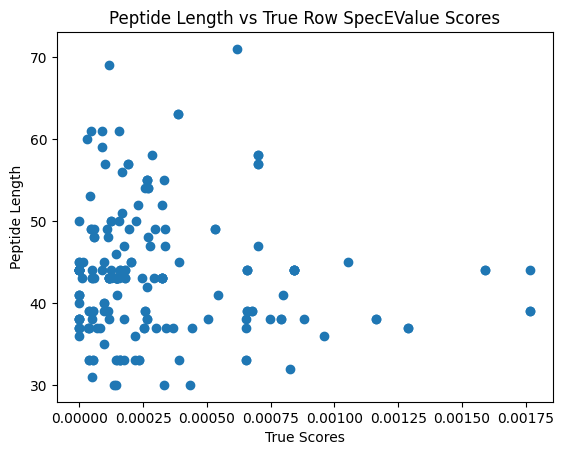

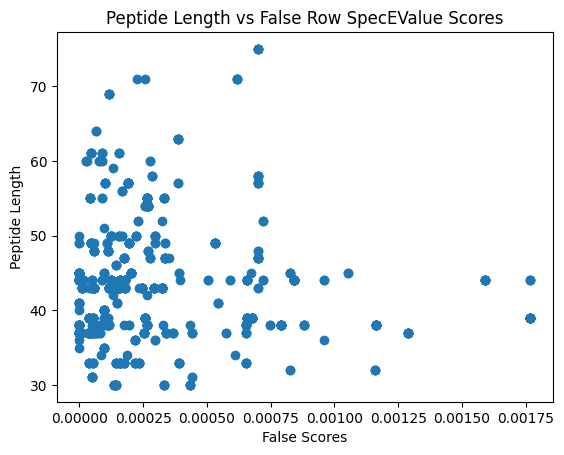

Data for rows containing modification C+
C+ True rows SpecEValue mean: 0.0002873883017833335, std: 0.00035114673593343565
C+ False rows SpecEValue mean: 0.0002652878191351352, std: 0.0003212418281603061


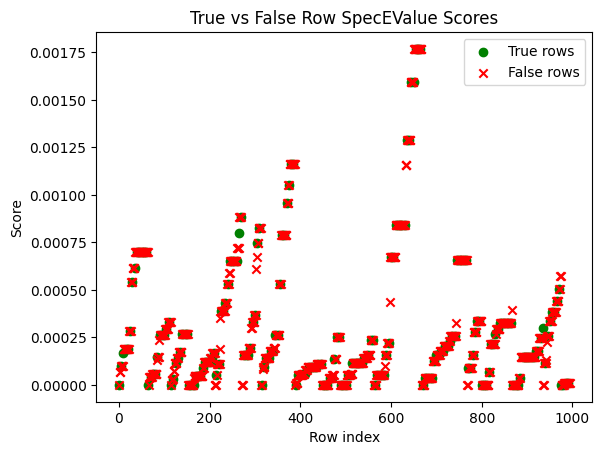



----------------------------------------
Analyzing score column: EValue
True rows EValue mean: {true_mean}, std: {true_std}
False rows EValue mean: {false_mean}, std: {false_std}

False rows with similar EValue scores to their associated true rows:


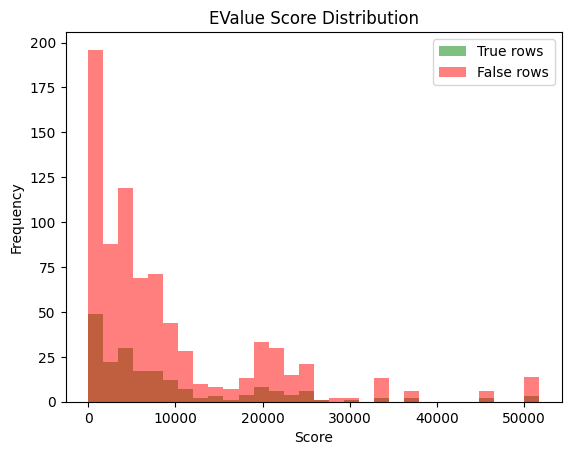

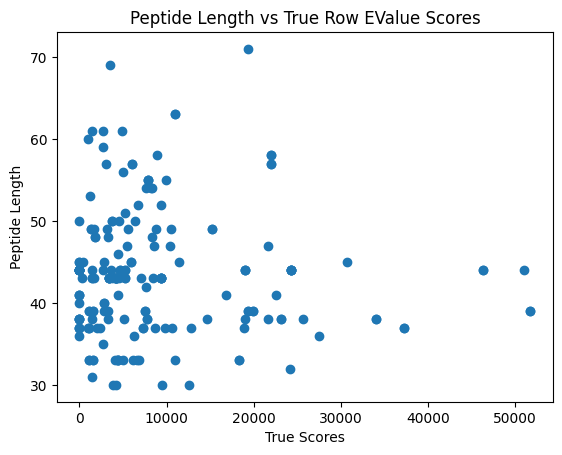

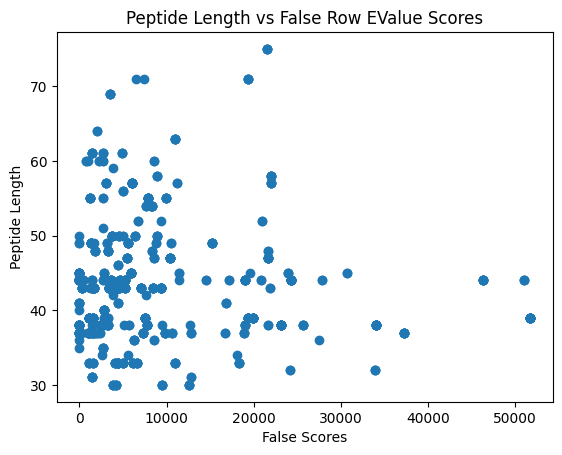

Data for rows containing modification C+
C+ True rows EValue mean: 8425.85908058334, std: 10225.17827256073
C+ False rows EValue mean: 7780.959600893973, std: 9360.90579041534


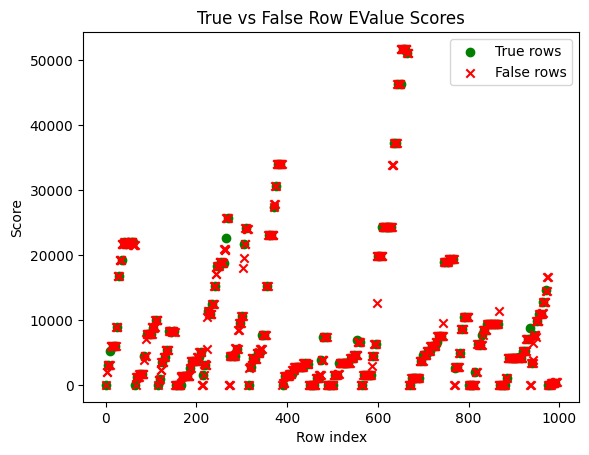

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_PEPTIDES_PER_SPECTRUM = 5

# WIP: perform the true/false correlation analysis for these score columns: MSGFScore, IsotopeError, PrecursorError, DeNovoScore, SpecEValue, EValue
def analyze_score(file_path, score_column, similarity_threshold=0.1):
    # Load CSV data
    # TSV
    df = pd.read_csv(file_path, sep='\t')
    # Remove whitespace from column names
    df.columns = df.columns.str.strip() 
    # Strip peptide names
    df['Peptide'] = df['Peptide'].str.strip()
    df['peptide_length'] = df['Peptide'].str.len()

    # print(df.keys())
    
    # Separate true and false rows
    true_rows = df.iloc[::NUM_PEPTIDES_PER_SPECTRUM]
    false_rows = df.drop(true_rows.index)

    true_scores = true_rows[score_column]
    false_scores = false_rows[score_column]

    # Calculate summary statistics
    true_mean = true_scores.mean()
    true_std = true_scores.std()
    false_mean = false_scores.mean()
    false_std = false_scores.std()

    print(f"True rows " + score_column + " mean: {true_mean}, std: {true_std}")
    print(f"False rows " + score_column + " mean: {false_mean}, std: {false_std}")

    # Compare false row scores with their associated true row
    false_rows['true_score'] = np.repeat(true_scores.values, NUM_PEPTIDES_PER_SPECTRUM-1)
    false_rows['score_diff'] = np.abs(false_rows['true_score'] - false_rows[score_column])

    close_rows = false_rows[false_rows['score_diff'] <= similarity_threshold]
    print("\nFalse rows with similar " + score_column + " scores to their associated true rows:")
    # print(close_rows)

    # Score distribution
    plt.figure()
    plt.hist(true_scores, bins=30, alpha=0.5, label='True rows', color='green')
    plt.hist(false_scores, bins=30, alpha=0.5, label='False rows', color='red')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(score_column + ' Score Distribution')
    plt.show()

    # Compare length of peptide string to score
    plt.figure()
    plt.scatter(true_rows[score_column], true_rows['peptide_length'])
    plt.xlabel("True Scores")
    plt.ylabel("Peptide Length")
    plt.title("Peptide Length vs True Row " + score_column + " Scores")
    plt.show()
    plt.figure()
    plt.scatter(false_rows[score_column], false_rows['peptide_length'])
    plt.xlabel("False Scores")
    plt.ylabel("Peptide Length")
    plt.title("Peptide Length vs False Row " + score_column + " Scores")
    plt.show()
    
    # Compare modifications to score
    # modification_columns = ['mod_C', 'mod_M', 'mod_N']  # Replace with actual modification columns
    # modification_scores = df.groupby(modification_columns)[score_column].mean()
    # print("\nAverage scores by modifications:")
    # print(modification_scores)

    # Compare average scores between peptides with and mouthout modified, e.g. "C+", "M+", "N+"
    modifications = {'C+', 'M+', 'N+', 'W+'}
    # Plot: Average score without modification, average score with each modification
    # Select rows from true_scores where contains +
    true_c_modification = true_rows[true_rows['Peptide'].str.contains('C+')]
    # Select rows from false_scores where contains +
    false_c_modification = false_rows[false_rows['Peptide'].str.contains('C+')]

    print("Data for rows containing modification C+")
    print(f"C+ True rows {score_column} mean: {true_c_modification[score_column].mean()}, std: {true_c_modification[score_column].std()}")
    print(f"C+ False rows {score_column} mean: {false_c_modification[score_column].mean()}, std: {false_c_modification[score_column].std()}")

    # True vs False Row Scores
    plt.figure()
    plt.scatter(true_rows.index, true_scores, label='True rows', color='green', marker='o')
    plt.scatter(false_rows.index, false_scores, label='False rows', color='red', marker='x')
    plt.xlabel('Row index')
    plt.ylabel('Score')
    plt.legend()
    plt.title("True vs False Row " + score_column + " Scores")
    plt.show()

# Example usage
score_columns = ['MSGFScore', 'IsotopeError', 'PrecursorError(ppm)', 'DeNovoScore', 'SpecEValue', 'EValue']
for score_column in score_columns:
    print("----------------------------------------")
    print("Analyzing score column:", score_column)
    analyze_score('abc.tsv', score_column, similarity_threshold=0.1)
    print("\n")

